In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib as mp
import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.optimize as so

## Problema 2

### Analice, compare y comente la serie *accidental deaths* de USA con la serie *sinestrialidad* en Chile

- Importación de las bases de datos

In [2]:
sinestrialidad= pd.read_csv('evolucionChile.csv',decimal=',',thousands='.')
sinestrialidad.head()

,Año,Siniestros,Fallecidos,Lesionados_graves,Lesionados_menos_graves,Lesionados_leves,Total_lesionados,Total_víctimas,Tasa_motorización,Vehículos_cada_100_habitantes,Parque_vehicular,Población,Indicadores_cada_10000_vehículos_Siniestralidad,Indicadores_cada_10000_vehículos_Mortalidad,Indicadores_cada_10000_vehículos_Morbilidad,Indicadores_cada_100000_habitantes_Siniestralidad,Indicadores_cada_100000_habitantes_Mortalidad,Indicadores_cada_100000_habitantes_Morbilidad,Fallecidos_cada_100_siniestros,Siniestros_por_cada_fallecido
0,1972,26727,1792,6590,5624,11027,23241,25033,24.7,4.0,401114,9907065,666.32,44.68,579.41,269.78,18.09,234.59,6.70,14.91
1,1973,23480,1719,6020,5153,10079,21252,22971,24.1,4.1,417767,10075782,562.04,41.15,508.70,233.03,17.06,210.92,7.32,13.66
2,1974,18356,1269,4935,3763,7938,16636,17905,23.8,4.2,431172,10244501,425.72,29.43,385.83,179.18,12.39,162.39,6.91,14.46
3,1975,16602,1054,4208,3479,7142,14829,15883,23.4,4.3,445693,10413219,372.50,23.65,332.72,159.43,10.12,142.41,6.35,15.75
4,1976,17716,1079,4322,3456,7355,15133,16212,22.7,4.4,466049,10565409,380.13,23.15,324.71,167.68,10.21,143.23,6.09,16.42


In [3]:
accidental_deaths=pd.read_csv('deaths.txt',delim_whitespace=True)
accidental_deaths.head()
#necesitamos hacer una limpieza de los datos para tenerlos como tipo de dato datetime

,Mont,Year,accidental_deaths
0,1,1973,9007
1,2,1973,8106
2,3,1973,8928
3,4,1973,9137
4,5,1973,10017


In [4]:
df=pd.DataFrame({'year':accidental_deaths['Year'].tolist(),
               'month':accidental_deaths['Mont'].tolist(),
                'day': [1]*len(accidental_deaths['Mont'].tolist())}) #se agrega el 1 como fecha referencial, no influye en nada
accidental_deaths['date']=pd.to_datetime(df)
accidental_deaths=accidental_deaths.drop(['Mont','Year'],axis=1)
accidental_deaths.head()

,accidental_deaths,date
0,9007,1973-01-01
1,8106,1973-02-01
2,8928,1973-03-01
3,9137,1973-04-01
4,10017,1973-05-01


### Creación de graficos

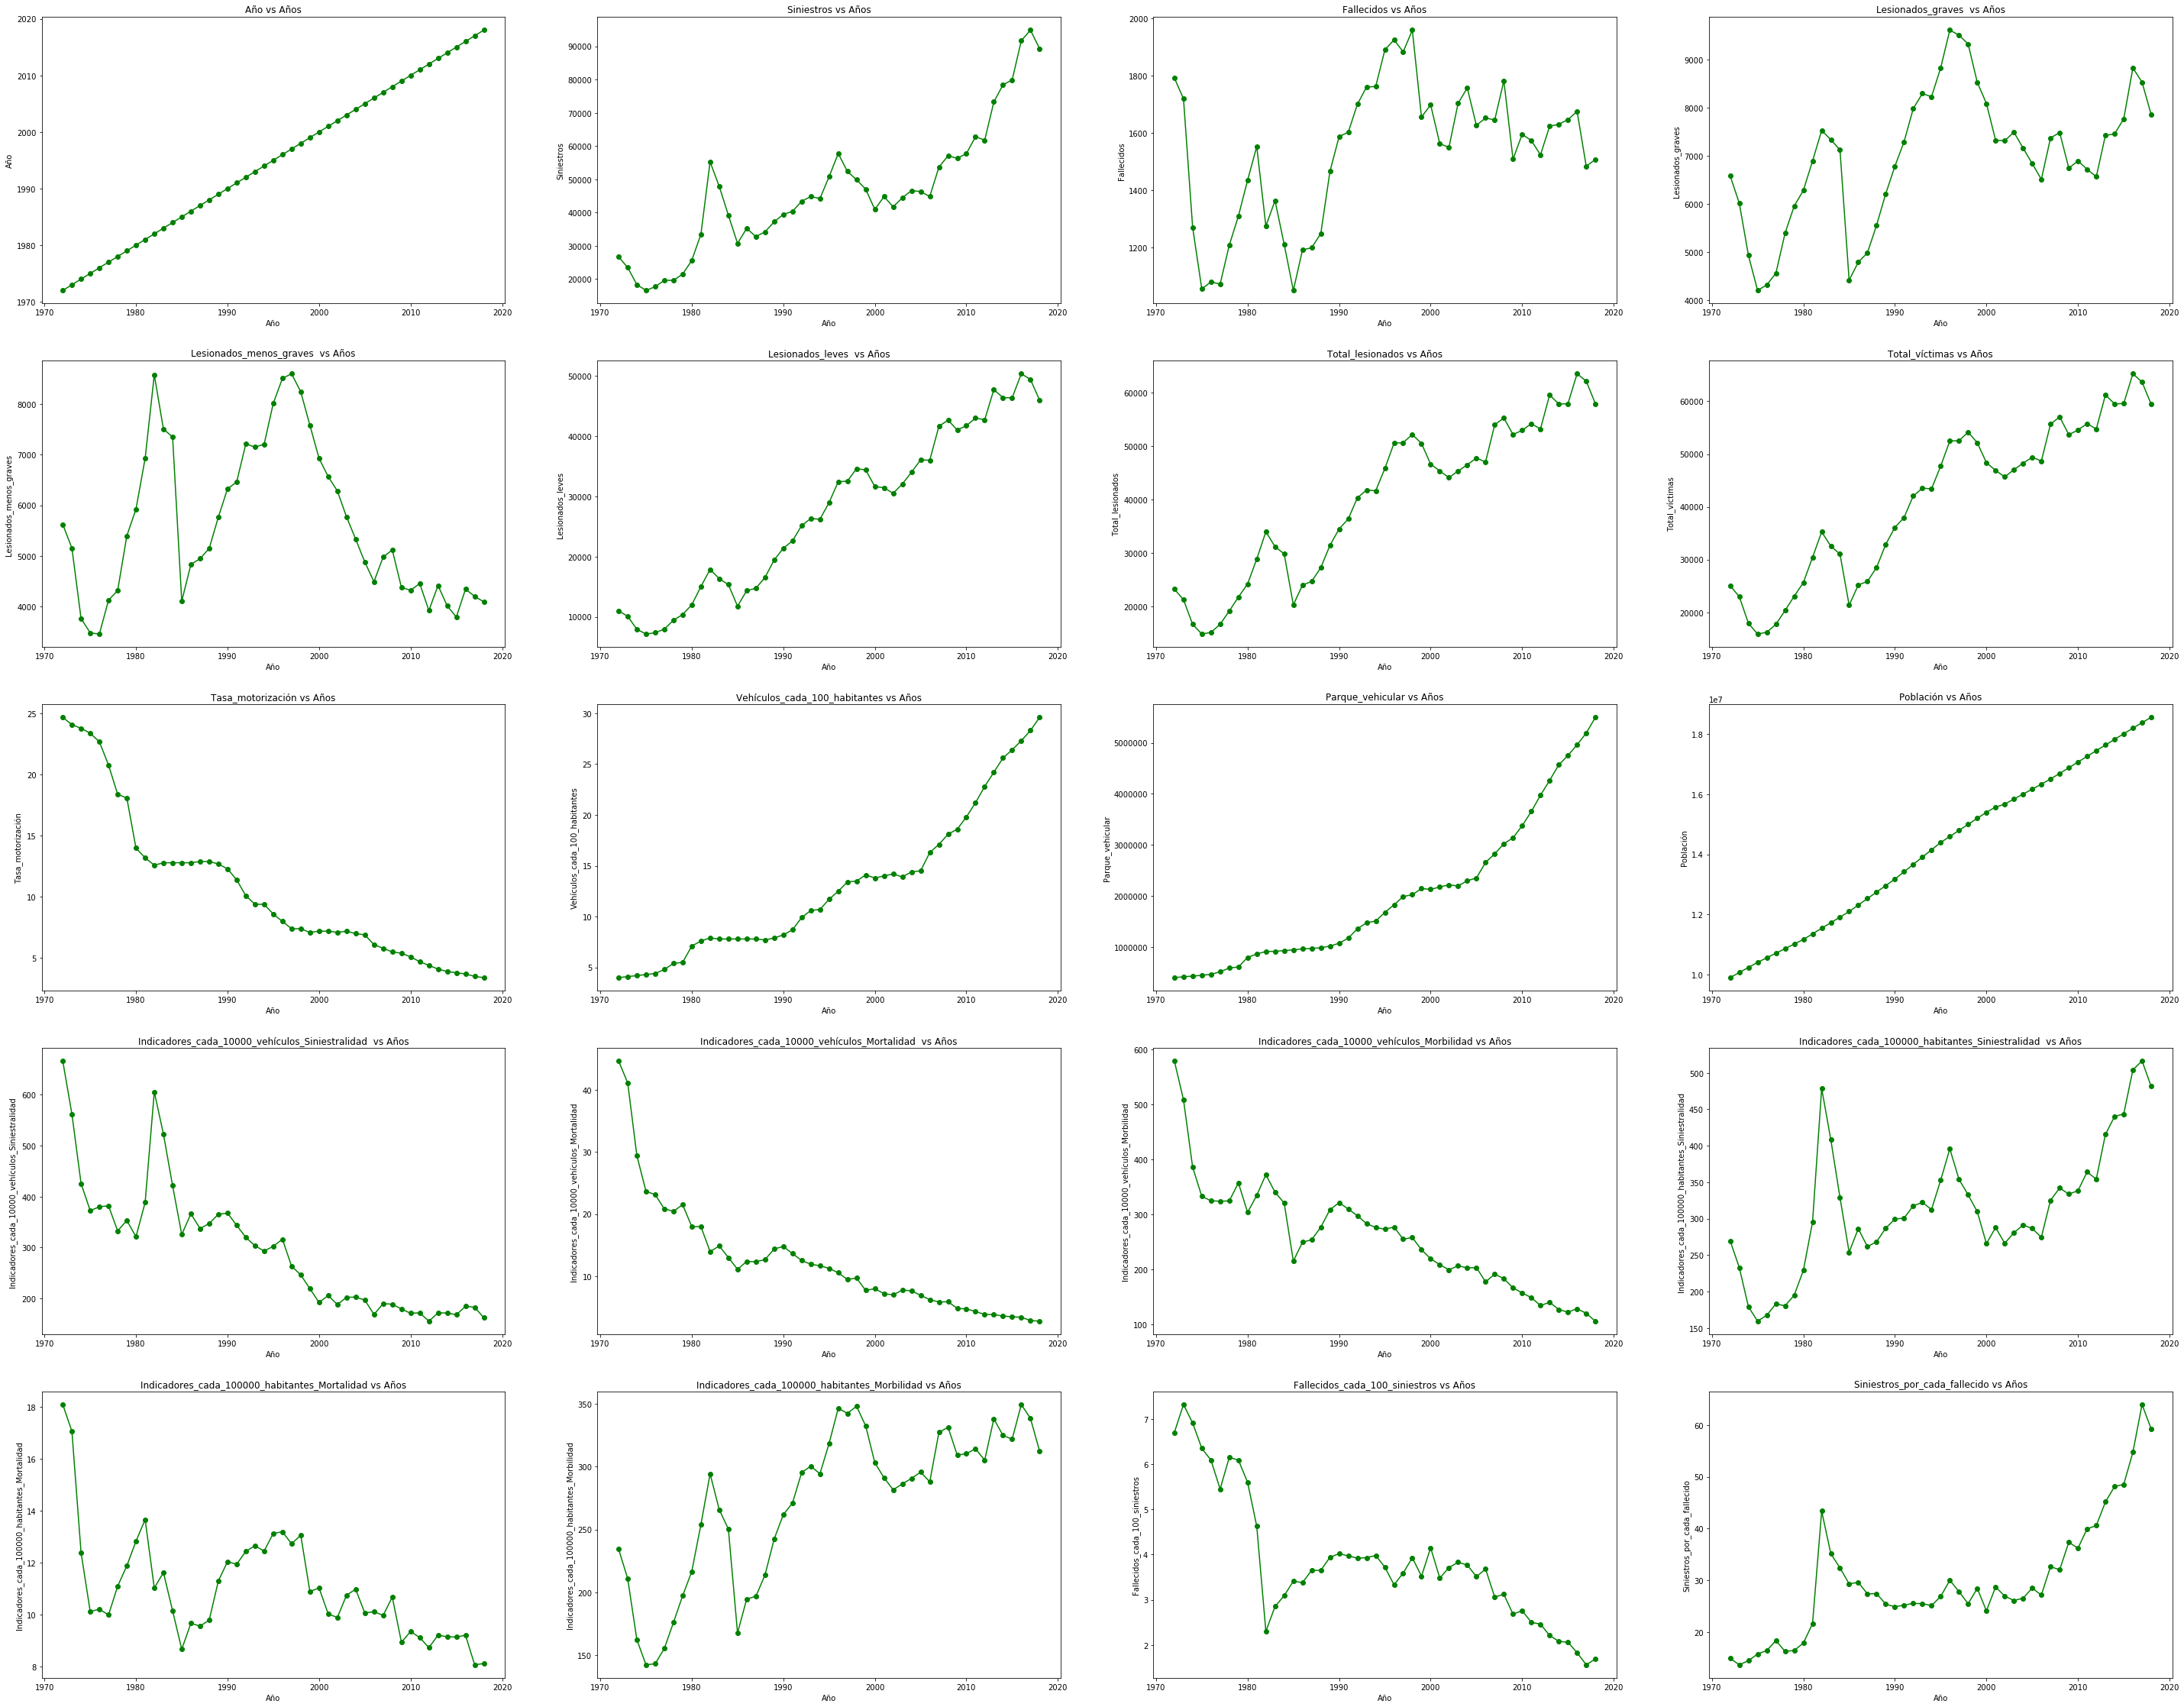

In [10]:
#En este programa se graficara cada grafico columna vs año, incluyendo el año vs año solo ya que invluyendo este dato tendremos la imprsión de los gráficos de forma cuadriular nrows=5, ncols=4
X=sinestrialidad['Año'].tolist()
rows=5
cols=4
fig, ax = plt.subplots(rows,cols,figsize=(50,40))

count=0
for i in range(0,rows):
    for j in range(0,cols):
        ax[i,j].plot(X,sinestrialidad[sinestrialidad.columns.tolist()[count]],color='g',marker='o')
        ax[i,j].set_title(sinestrialidad.columns.tolist()[count]+' vs Años')
        ax[i,j].set_xlabel('Año')
        ax[i,j].set_ylabel(sinestrialidad.columns.tolist()[count])
        count+=1
plt.show()

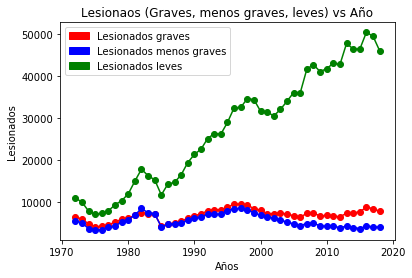

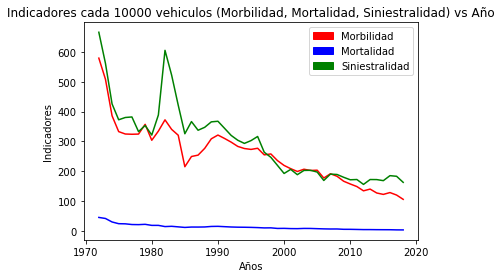

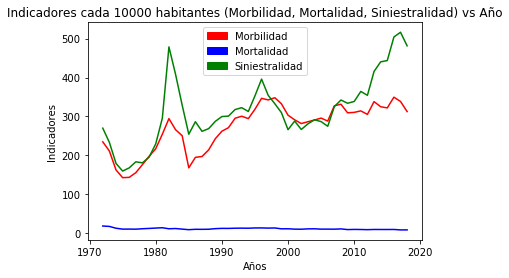

In [11]:
#notemos que en algunos casos tiene más sentido graficar varios graficos en uno como los es el caso de lesionados (graves, menos grave, leves), indicadaros cada 10000 vehiculos (siniestrabilidad,mortalidad,morbilidad), indicadores cada 10000 habitantes (siniestralidad,mortabilidad, morbilidad).

#Lesionados(graves, menos graves, leves)

plt.plot(X,sinestrialidad['Lesionados_graves '].tolist(),color='r')
plt.plot(X,sinestrialidad['Lesionados_menos_graves '].tolist(),color='b')
plt.plot(X,sinestrialidad['Lesionados_leves '].tolist(),color='g')
plt.title('Lesionaos (Graves, menos graves, leves) vs Año')
red_patch = mpatches.Patch(color='red', label='Lesionados graves')
blue_patch = mpatches.Patch(color='blue', label='Lesionados menos graves')
green_patch = mpatches.Patch(color='green', label='Lesionados leves')
plt.legend(handles=[red_patch,blue_patch,green_patch])
plt.xlabel('Años')
plt.ylabel('Lesionados')
plt.show()

#Indicadores cada 10000 vehiculos
plt.plot(X,sinestrialidad['Indicadores_cada_10000_vehículos_Morbilidad'].tolist(),color='r')
plt.plot(X,sinestrialidad['Indicadores_cada_10000_vehículos_Mortalidad '].tolist(),color='b')
plt.plot(X,sinestrialidad['Indicadores_cada_10000_vehículos_Siniestralidad '].tolist(),color='g')
plt.title('Indicadores cada 10000 vehiculos (Morbilidad, Mortalidad, Siniestralidad) vs Año')
red_patch = mpatches.Patch(color='red', label='Morbilidad')
blue_patch = mpatches.Patch(color='blue', label='Mortalidad')
green_patch = mpatches.Patch(color='green', label='Siniestralidad')
plt.legend(handles=[red_patch,blue_patch,green_patch])
plt.xlabel('Años')
plt.ylabel('Indicadores')
plt.show()

#Indicadores cada 10000 personas

plt.plot(X,sinestrialidad['Indicadores_cada_100000_habitantes_Morbilidad'].tolist(),color='r')
plt.plot(X,sinestrialidad['Indicadores_cada_100000_habitantes_Mortalidad'].tolist(),color='b')
plt.plot(X,sinestrialidad['Indicadores_cada_100000_habitantes_Siniestralidad '].tolist(),color='g')
plt.title('Indicadores cada 100000 habitantes (Morbilidad, Mortalidad, Siniestralidad) vs Año')
red_patch = mpatches.Patch(color='red', label='Morbilidad')
blue_patch = mpatches.Patch(color='blue', label='Mortalidad')
green_patch = mpatches.Patch(color='green', label='Siniestralidad')
plt.legend(handles=[red_patch,blue_patch,green_patch])
plt.xlabel('Años')
plt.ylabel('Indicadores')
plt.show()



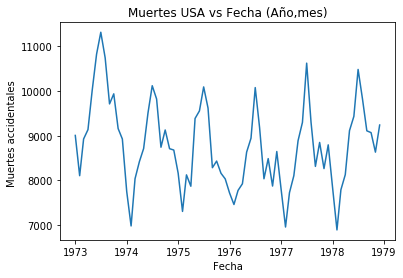

In [9]:
#Ahora graficaremos para deaths
plt.plot(accidental_deaths['date'],accidental_deaths['accidental_deaths'].tolist())
plt.title('Muertes USA vs Fecha (Año,mes)')
plt.xlabel('Fecha')
plt.ylabel('Muertes accidentales ')
plt.show()


## Tendecia

#### **Siniestros Chile**
- Siniestros vs año : tendencia al alza
- Fallecidos vs año : no se observa tendencia clara
- Lesionados graves vs año : tendencia horizontal
- Lesionados menos graves vs año : tendencia horizontal
- Lesionados leves vs año : tendencia al alza
- Total lesionados  vs año : tendencia al alza
- Total victimas vs año : tendencia al alza
- Tasa motorización vs año : tendencia a la baja
- Vehiculos cada 100 habitantes vs año : tendencia al alza
- Indicadores cada 10000 vehiculos: Siniestralidad vs año : tendencia a la baja
- Indicadores cada 10000 vehiculos: Mortalidad vs año : tendencia horizontal
- Indicadores cada 10000 vehiculos: Morbilidad vs año : tendencia a la baja
- Indicadores cada 100000 habitantes: Siniestralidad vs año : tendencia al alza
- Indicadores cada 100000 habitantes: Mortalidad vs año : tendencia horizontal
- Indicadores cada 100000 habitantes: Morbilidad vs año : tendencia al alza
- Fallecidos cada 100 siniestros vs año : tendencia a la baja
- Siniestros por cada Fallecidos vs año : tendencia al alza

#### **Muertes accidentales USA**
- Muertes vs mes/año : no se aprecia tendencia

### Estacionalidad

#### **Siniestros Chile** : No se aprecia estacionalidad
- Siniestros vs año 
- Fallecidos vs año 
- Lesionados graves vs año 
- Lesionados menos graves vs año 
- Lesionados leves vs año 
- Total lesionados  vs año 
- Total victimas vs año 
- Tasa motorización vs año 
- Vehiculos cada 100 habitantes vs año 
- Indicadores cada 10000 vehiculos: Siniestralidad vs año 
- Indicadores cada 10000 vehiculos: Mortalidad vs año 
- Indicadores cada 10000 vehiculos: Morbilidad vs año 
- Indicadores cada 100000 habitantes: Siniestralidad vs año 
- Indicadores cada 100000 habitantes: Mortalidad vs año 
- Indicadores cada 100000 habitantes: Morbilidad vs año 
- Fallecidos cada 100 siniestros vs año 
- Siniestros por cada Fallecidos vs año 

#### **Muertes accidentales USA**
- Muertes vs mes/año : se aprecia estacionalidad, a mitad de año hay un un amuento claro en las muertes, mientras que que en los meses de fin/principio de año hay una baja de muertes

In [ ]:
### Ruido
##